# Arbre de décisions

In [1]:
import pandas as pd

In [2]:
df_billet = pd.read_csv("C:\\Users\\fbbou\\Notebook Jupyter\\DATA\\billets.csv",sep=";")
df_billet

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [3]:
df_billet.shape

(1500, 7)

In [4]:
from sklearn import tree

In [22]:
y = df_billet['is_genuine']

In [6]:
x = df_billet.iloc[:,1:]

In [11]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   diagonal      1500 non-null   float64
 1   height_left   1500 non-null   float64
 2   height_right  1500 non-null   float64
 3   margin_low    1500 non-null   float64
 4   margin_up     1500 non-null   float64
 5   length        1500 non-null   float64
dtypes: float64(6)
memory usage: 70.4 KB


In [43]:
# Imputation des données manquantes par la méthode des plus proche voisin

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
df_billet = pd.DataFrame(imputer.fit_transform(df_billet),columns=df_billet.columns)

In [44]:
from sklearn.model_selection import train_test_split
df_train, df_test= train_test_split(df_billet, test_size=0.3, stratify = df_billet.is_genuine, random_state=1)

In [45]:
print(df_train.is_genuine.value_counts(normalize = True))
print(df_test.is_genuine.value_counts(normalize = True))

1.0    0.666667
0.0    0.333333
Name: is_genuine, dtype: float64
1.0    0.666667
0.0    0.333333
Name: is_genuine, dtype: float64


In [46]:
df_billet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   float64
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: float64(7)
memory usage: 82.2 KB


In [35]:
# Instanciation de l'arbre 
from sklearn.tree import DecisionTreeClassifier as dtc

>**Instanciation avec 2 paramètres**      
un sommet n'est pas segmenté s'il est composé de moins de 30 individus : min_samples_split = 30        
une segmentation est validée ssi les feuilles générées comportent toutes au moins 10 obs : min_samples_leaf = 10

In [47]:
T1 = dtc(min_samples_split = 30, min_samples_leaf = 10)

In [48]:
T1.fit(X = df_train.iloc[:,1:] , y = df_train.is_genuine)

DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=30)

## Affichage de l'arbre

>Paramètre feature_names permet de reccupérer la liste des variables explicatives

[Text(167.40000000000003, 195.696, 'length <= 112.375\ngini = 0.444\nsamples = 1050\nvalue = [350, 700]'),
 Text(66.96000000000001, 152.208, 'margin_low <= 4.18\ngini = 0.031\nsamples = 319\nvalue = [314, 5]'),
 Text(33.480000000000004, 108.72, 'gini = 0.444\nsamples = 12\nvalue = [8, 4]'),
 Text(100.44000000000001, 108.72, 'length <= 112.295\ngini = 0.006\nsamples = 307\nvalue = [306, 1]'),
 Text(66.96000000000001, 65.232, 'gini = 0.0\nsamples = 297\nvalue = [297, 0]'),
 Text(133.92000000000002, 65.232, 'gini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(267.84000000000003, 152.208, 'margin_low <= 5.055\ngini = 0.094\nsamples = 731\nvalue = [36, 695]'),
 Text(234.36, 108.72, 'margin_up <= 3.395\ngini = 0.031\nsamples = 706\nvalue = [11, 695]'),
 Text(200.88000000000002, 65.232, 'length <= 112.485\ngini = 0.012\nsamples = 680\nvalue = [4, 676]'),
 Text(167.40000000000003, 21.744, 'gini = 0.346\nsamples = 18\nvalue = [4, 14]'),
 Text(234.36, 21.744, 'gini = 0.0\nsamples = 662\nvalue = [

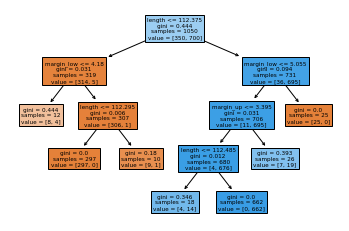

In [54]:
plot_tree(T1,feature_names = list(df_billet.columns[1: ]),filled = True)

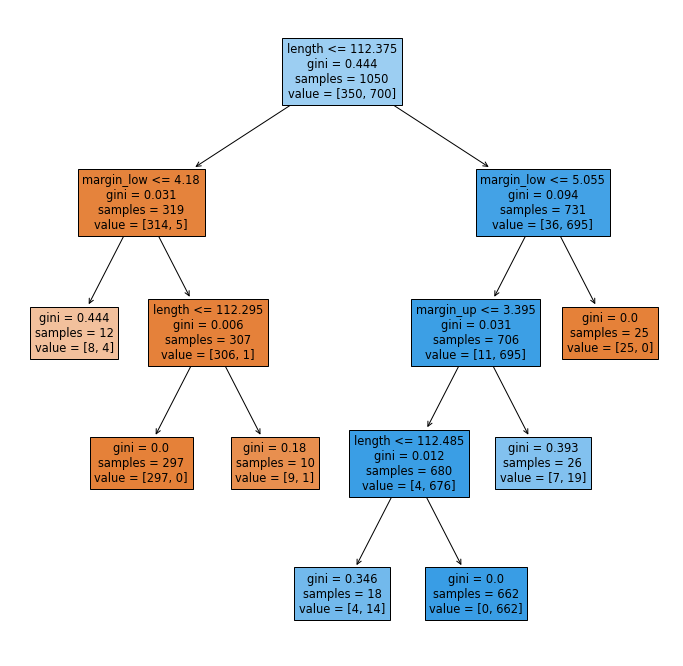

In [56]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize = (12,12))
plot_tree(T1,feature_names = list(df_billet.columns[1: ]),filled = True)
plt.show()

> **Interprétation**    
>
>Nous observons l'effectif de l'échantillon d'apprentissage sur la racine (sommet)       
Les sommets sont teintés (c'est le rôle de l'option filled = True) selon la classe majoritaire qu'ils portent,       
avec plus ou moins d'intensitéselon la concentration des effectifs.      
>
>La concentration des classes est calculée à l'aide de l'indice de Gini,     
on parle aussi de mesure d'impureté ou de mesure de diversité.

## Rappel : Indice de Gini

> L'indice de Gini est un indicateur synthétique permettant de rendre compte du niveau d'inégalité     
pour une variable et sur une population donnée.   
>
>Il varie entre 0 (égalité parfaite) et 1 (inégalité extrème).      
Entre 0 et 1 l'inégalité est d'autant plus forte que l'indice de Gini est élevé.      
>
>Il est égal à 0  dans une situation d'égalité parfaite où la variable prend une valeur identique sur l'ensemble de la population.     
>
>A l'autre extrème, il est égal à 1 dans la situation la plus inégalitaire possible,        
où la varible vaut 0 sur toute la population à l'expeption d'un individu.        
  

## Affichage sous forme de règles imbriquées de l'arbre

In [63]:
from sklearn.tree import export_text
print(export_text(T1, feature_names = list(df_billet.columns[1:]),show_weights = True))

|--- length <= 112.38
|   |--- margin_low <= 4.18
|   |   |--- weights: [8.00, 4.00] class: 0.0
|   |--- margin_low >  4.18
|   |   |--- length <= 112.30
|   |   |   |--- weights: [297.00, 0.00] class: 0.0
|   |   |--- length >  112.30
|   |   |   |--- weights: [9.00, 1.00] class: 0.0
|--- length >  112.38
|   |--- margin_low <= 5.06
|   |   |--- margin_up <= 3.40
|   |   |   |--- length <= 112.49
|   |   |   |   |--- weights: [4.00, 14.00] class: 1.0
|   |   |   |--- length >  112.49
|   |   |   |   |--- weights: [0.00, 662.00] class: 1.0
|   |   |--- margin_up >  3.40
|   |   |   |--- weights: [7.00, 19.00] class: 1.0
|   |--- margin_low >  5.06
|   |   |--- weights: [25.00, 0.00] class: 0.0



In [70]:
# Importance des variables
importance = {"Variable":df_billet.columns[1:],"Importance":T1.feature_importances_}
pd.DataFrame(importance).sort_values(by = "Importance",ascending=False)

,Variable,Importance
5,length,0.880864
3,margin_low,0.111297
4,margin_up,0.007839
0,diagonal,0.000000
1,height_left,0.000000
2,height_right,0.000000


## Prédiction

In [71]:
# Prédiction sur l'échantillon test
prediction = T1.predict(X=df_test.iloc[:,1:])

In [73]:
# Distribution des prédictions
import numpy as np
np.unique(prediction,return_counts = True)

(array([0., 1.]), array([146, 304], dtype=int64))

In [ ]:
# Matrice de confusion

In [74]:
from sklearn import metrics
metrics.confusion_matrix(df_test.is_genuine,prediction)

array([[144,   6],
       [  2, 298]], dtype=int64)

In [76]:
# Taux de reconnaissance
metrics.accuracy_score(df_test.is_genuine,prediction)

0.9822222222222222

In [77]:
# Taux d'erreur
1- metrics.accuracy_score(df_test.is_genuine,prediction)

0.01777777777777778

In [79]:
# Rappel / Sensibilité
metrics.recall_score(df_test.is_genuine,prediction,pos_label = 1)

0.9933333333333333

In [80]:
# Précision
metrics.precision_score(df_test.is_genuine,prediction,pos_label = 1)

0.9802631578947368

In [81]:
# F1-score : moyenne harmonique entre rappel et précision
metrics.f1_score(df_test.is_genuine,prediction,pos_label = 1)

0.9867549668874172

In [83]:
# Rapport de prediction
print(metrics.classification_report(df_test.is_genuine,prediction))

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97       150
         1.0       0.98      0.99      0.99       300

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

